# Step 1 : Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Step 2 : Load Dataset

In [3]:
df=pd.read_csv('cars.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.columns=['buying','maint','doors','persons','lug_boost','safety','class']
df.head()

,buying,maint,doors,persons,lug_boost,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.shape

(1728, 7)

In [6]:
for col in df.columns:
    print(df[col].value_counts())
    print()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boost
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



# Step 3 : Data Preprocessing

In [7]:
df.isnull().sum()

buying       0
maint        0
doors        0
persons      0
lug_boost    0
safety       0
class        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   object
 1   maint      1728 non-null   object
 2   doors      1728 non-null   object
 3   persons    1728 non-null   object
 4   lug_boost  1728 non-null   object
 5   safety     1728 non-null   object
 6   class      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## we need to perform label encoder on all the columns because all the columns contain object data type

In [9]:
le=LabelEncoder()

for x in df.columns:
    print(x)
    df[x]=le.fit_transform(df[x])
    le_name=dict(zip(le.classes_,le.transform(le.classes_)))
    print('-------------------------------------------------')
    print(le_name)
    
    

buying
-------------------------------------------------
{'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
maint
-------------------------------------------------
{'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
doors
-------------------------------------------------
{'2': 0, '3': 1, '4': 2, '5more': 3}
persons
-------------------------------------------------
{'2': 0, '4': 1, 'more': 2}
lug_boost
-------------------------------------------------
{'big': 0, 'med': 1, 'small': 2}
safety
-------------------------------------------------
{'high': 0, 'low': 1, 'med': 2}
class
-------------------------------------------------
{'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [10]:
df.head()

,buying,maint,doors,persons,lug_boost,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


# Step 4 : Seperate indeoendent and dependent variable

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
x.head()

,buying,maint,doors,persons,lug_boost,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [13]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [14]:
print(x.shape)
print(y.shape)

(1728, 6)
(1728,)


# Step 5 : Data Splitting

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# verify splitting data
print("Total Data:",df.shape)
print("x Train:",x_train.shape)
print("x Test:",x_test.shape)
print("y Train:",y_train.shape)
print("y Test:",y_test.shape)

Total Data: (1728, 7)
x Train: (1209, 6)
x Test: (519, 6)
y Train: (1209,)
y Test: (519,)


# Step 6 : Data Normalization

In [16]:
# perform data normalization

#create object for scaler
scaler=MinMaxScaler()

# fot the train data on the scaler
scaler.fit(x_train)

x_train_scale=scaler.transform(x_train)
x_test_scale=scaler.transform(x_test)

In [17]:
x_train_scale[0]

array([0.        , 0.        , 0.33333333, 1.        , 0.        ,
       0.        ])

In [18]:
x_test_scale[0]

array([0.66666667, 1.        , 1.        , 0.5       , 1.        ,
       0.5       ])

Note : In this dataset we can see all the values from all the columns and rows are ranging from 0 to 5 so there is no extreme high and low values so that's why we don't need to perform standardisation and normalization

# Step 7 : Build Model

### Logistics Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#create a model
classifier=LogisticRegression()

#fitting training data in to the model
classifier.fit(x_train_scale,y_train)

LogisticRegression()

In [21]:
# prediction using the model
y_pred=classifier.predict(x_test_scale)
#y_pred
l1=list(zip(y_test,y_pred))

In [22]:
print(l1)

[(2, 2), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (0, 2), (0, 2), (2, 0), (0, 2), (2, 0), (2, 2), (2, 2), (2, 2), (0, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 0), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (3, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (1, 2), (3, 2), (1, 2), (2, 2), (0, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (3, 0), (2, 2), (2, 2), (0, 2), (0, 0), (2, 2), (2, 2), (3, 0), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (0, 2), (3, 2), (2, 2), (2, 2), (2, 0), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (1, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2),

In [23]:
accuracy_score(y_test,y_pred)

0.697495183044316

In [24]:
confusion_matrix(y_test,y_pred)

array([[ 20,   0,  80,   2],
       [  3,   0,  18,   0],
       [ 30,   0, 341,   0],
       [ 10,   0,  14,   1]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.20      0.24       102
           1       0.00      0.00      0.00        21
           2       0.75      0.92      0.83       371
           3       0.33      0.04      0.07        25

    accuracy                           0.70       519
   macro avg       0.35      0.29      0.29       519
weighted avg       0.62      0.70      0.64       519



/Users/yashporiya/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashporiya/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashporiya/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier()

In [28]:
dt.fit(x_train_scale,y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dt=dt.predict(x_test_scale)
l2=list(zip(y_test,y_pred_dt))
print(l2)

[(2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (3, 3), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (1, 1), (3, 3), (1, 1), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (3, 3), (2, 2), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (3, 3), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0),

In [33]:
print("Accuracy Score :-")
accuracy_score(y_test,y_pred_dt)

Accuracy Score :-


0.9865125240847784

In [34]:
print("Confusion Matrix :-")
confusion_matrix(y_test,y_pred_dt)

Confusion Matrix :-


array([[ 99,   2,   1,   0],
       [  4,  17,   0,   0],
       [  0,   0, 371,   0],
       [  0,   0,   0,  25]])

In [35]:
print("Classification Report :-")
print(classification_report(y_test,y_pred_dt))

Classification Report :-
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      1.00      1.00        25

    accuracy                           0.99       519
   macro avg       0.96      0.95      0.95       519
weighted avg       0.99      0.99      0.99       519



CPU times: user 871 ms, sys: 74.8 ms, total: 946 ms
Wall time: 945 ms


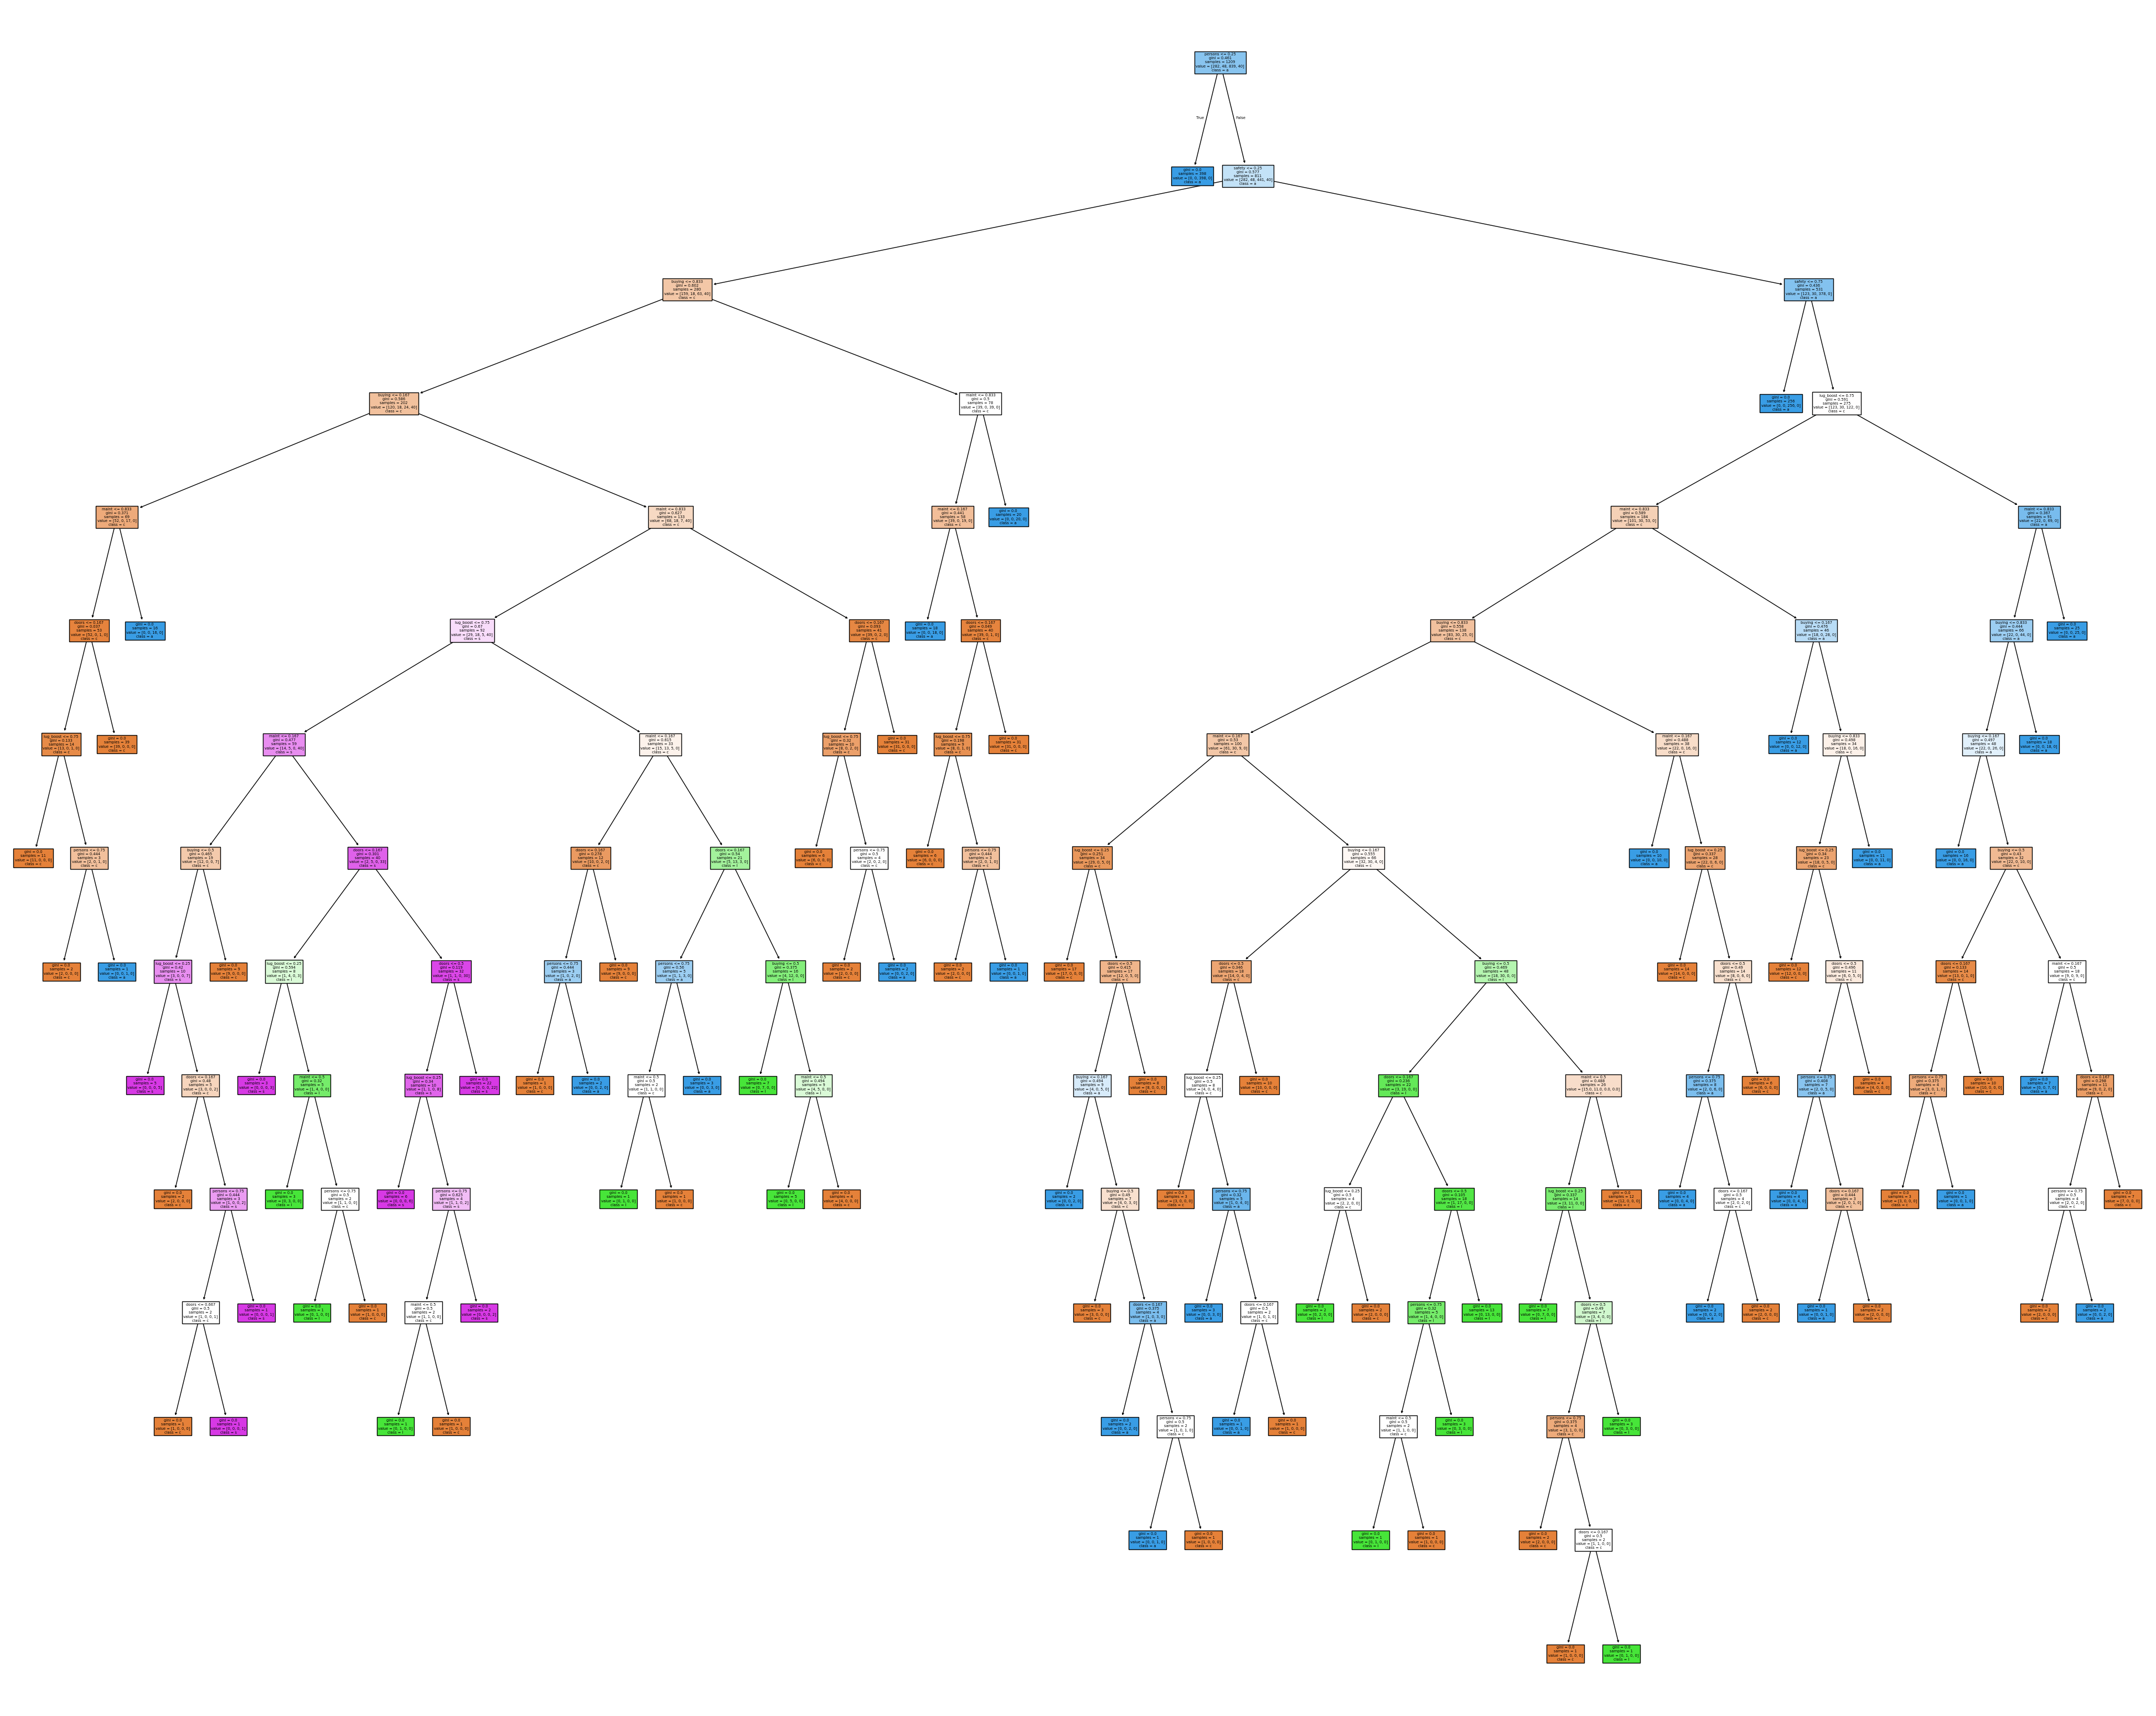

In [45]:
%%time

fig=plt.figure(figsize=(50,40))
dot_data=tree.plot_tree(dt,
                       feature_names=list(df.columns[:-1]),
                       class_names=list(df.columns[-1]),
                       filled=True)
#plt.savefig('Base_Model1.jpeg')

## Tuning the Decision Tree Mdoel

In [37]:
# create model object with custom parameters


model_dt2=DecisionTreeClassifier(criterion='gini',    # press shift+tab to check other parameters
                                random_state=10,
                                min_samples_leaf=10,
                                min_samples_split=2,
                                max_leaf_nodes=80,
                                max_depth=None)

# fit the model on the data and predict the values
model_dt2.fit(x_train,y_train)
print('Depth :',model_dt2.get_depth())

#prediction on the test data 
y_pred2=model_dt2.predict(x_test)

Depth : 10


In [39]:
print("Accuracy Score for Tuned Model :-")
accuracy_score(y_test,y_pred2)

Accuracy Score for Tuned Model :-


0.9479768786127167

In [40]:
print("Confusion Matrix for Tuned Model :-")
confusion_matrix(y_test,y_pred2)

Confusion Matrix for Tuned Model :-


array([[ 96,   5,   0,   1],
       [  0,  17,   0,   4],
       [ 10,   1, 360,   0],
       [  6,   0,   0,  19]])

In [42]:
print("Classification Report for Tuned Model:-\n")
print(classification_report(y_test,y_pred_dt))

Classification Report for Tuned Model:-

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      1.00      1.00        25

    accuracy                           0.99       519
   macro avg       0.96      0.95      0.95       519
weighted avg       0.99      0.99      0.99       519



CPU times: user 508 ms, sys: 37.3 ms, total: 546 ms
Wall time: 544 ms


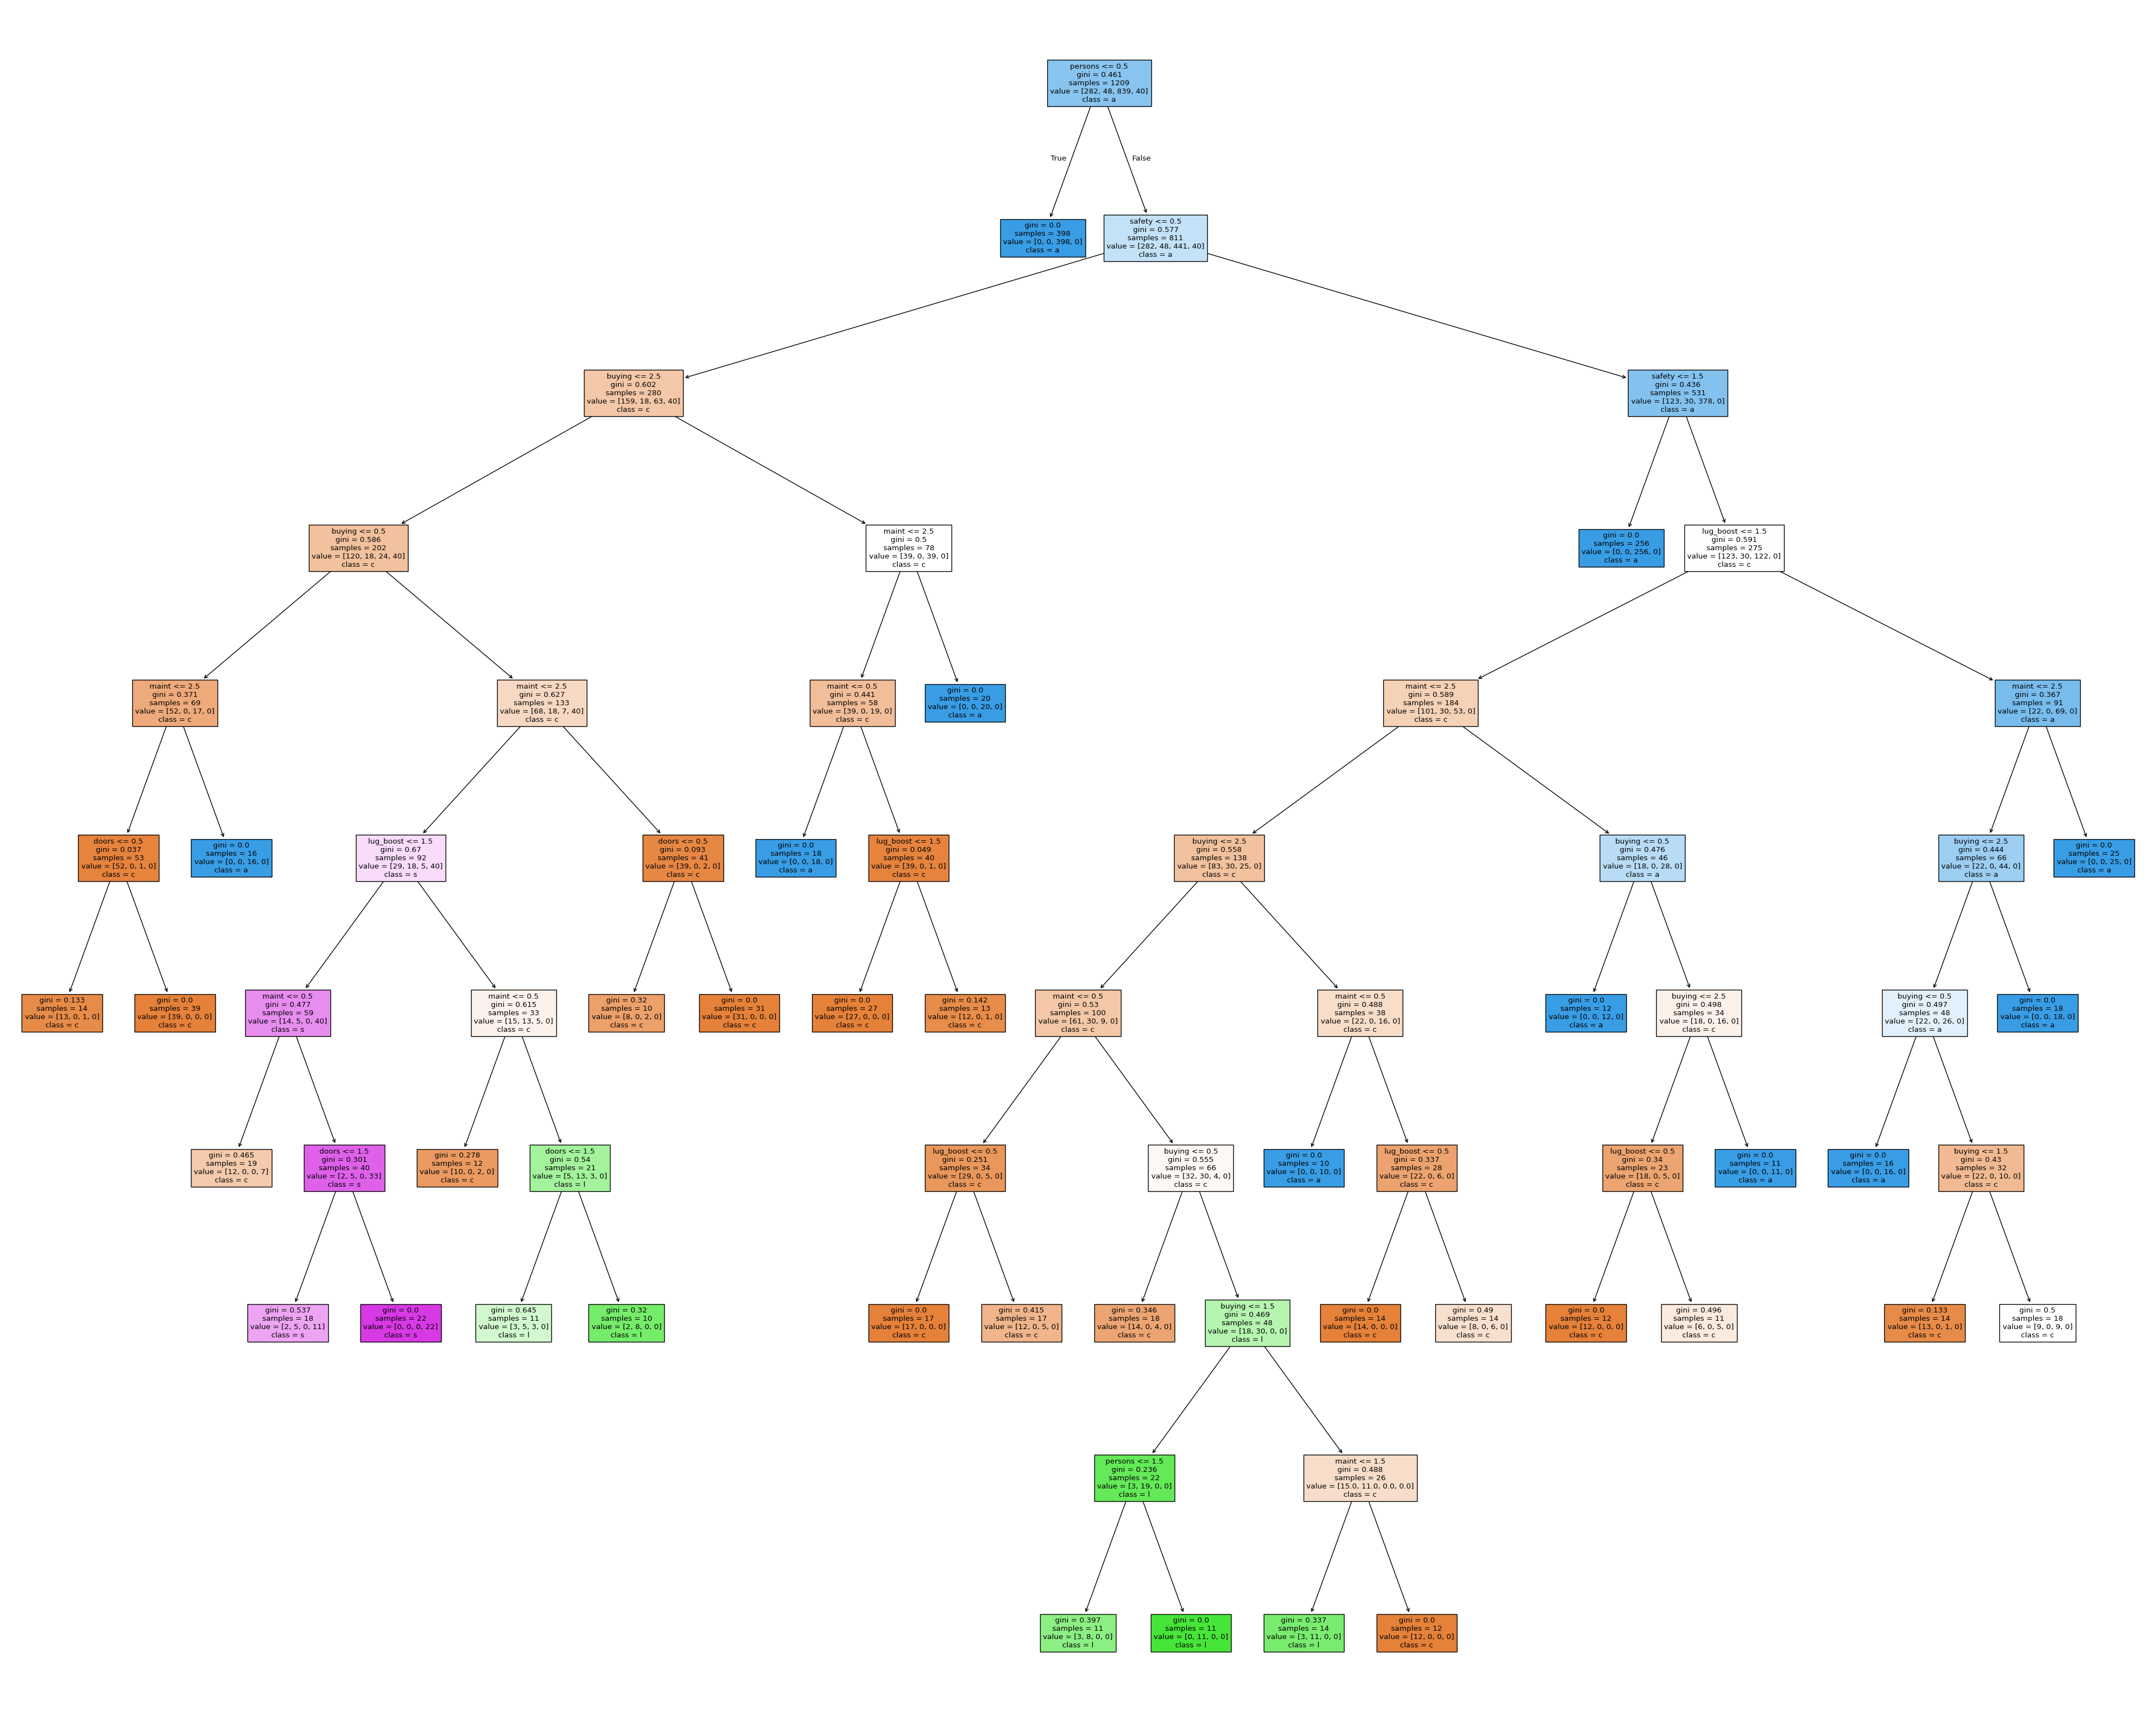

In [46]:
%%time

fig=plt.figure(figsize=(50,40))
dot_data=tree.plot_tree(model_dt2,
                       feature_names=list(df.columns[:-1]),
                       class_names=list(df.columns[-1]),
                       filled=True)
#plt.savefig('Tuned_Model.jpeg')